## Data cleaning for 2017 VA House of Delegates Election

### Algorithm
Ok, so this is my first step in the data cleaning project. 
- The algorithm: Markov Chain Monte Carlo (MCMC), as described in (Fifield et al., 2020)
- This algorithm is implemented in the R library `redist`
- It requires this data format, where each row is one precinct. 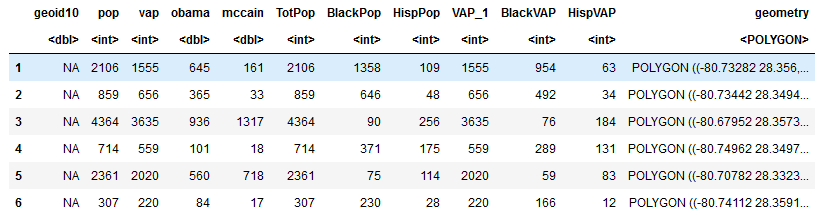


### Data
Now for the election data. 
- I'm going to start with the data that's helpfully been maintaned by the Metic Geometry and Gerrymandering Group (MGGG) and the Princeton Gerrymandering Project in the GitHub repo `mggg-states/VA-shapefiles`, access [here][1], and is cited as (MGGG, 2019/2021).
- It contains election results for the 2017 VA House of Delegates elections, among others. 
- The population data comes from an organization called National Historical Geographic Information System [(NHGIS)][2].
- This data is store in `data/VA-precincts`

[1]: https://github.com/mggg-states/VA-shapefiles
[2]: https://www.nhgis.org/

### Working with shapefiles

Just putting this in as a reminder to myself, but this is a helpful guide to the shapefile file formats. 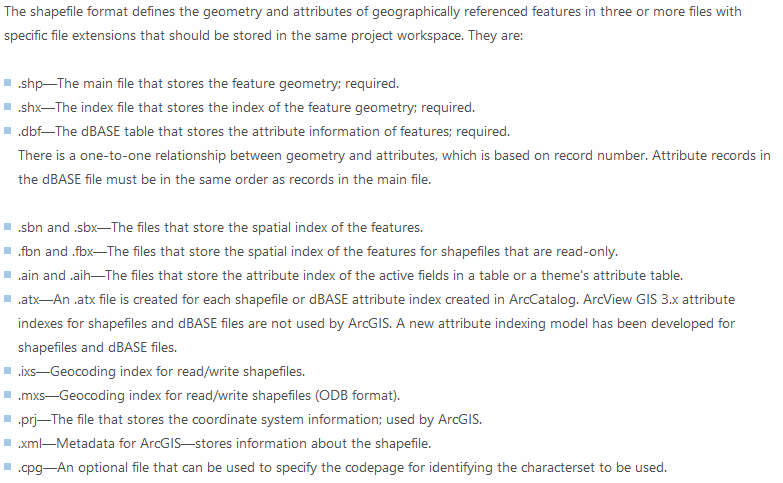
Source: https://wordpress.com/support/markdown-quick-reference/

### Data Cleaning

Let's get working.


#### State of VA Data

In [1]:
import geopandas
import pandas as pd

df = geopandas.read_file("../data/VA-shapefiles-master/VA_precincts/VA_precincts.shp")
df.head(3)

,precinct,locality,loc_prec,district,G18DHOR,G18DSEN,G18OHOR,G18OSEN,G18RHOR,G18RSEN,...,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,CD_12,CD_16,HDIST_11,HDIST_REM,SENDIST,geometry
0,Glenkirk,Prince William County,Prince William County Glenkirk,Congressional District 1,980.0,1044.0,0.0,32.0,950.0,856.0,...,400.999998,1.000000e+00,4.0,41.0,1.0,1.0,13,13,13,"POLYGON ((163199.056 308336.365, 163189.724 30..."
1,Buckland Mills,Prince William County,Prince William County Buckland Mills,Congressional District 1,938.0,978.0,0.0,31.0,766.0,701.0,...,449.000002,1.190457e-07,6.0,73.0,1.0,1.0,13,13,13,"POLYGON ((162078.796 309095.892, 162068.091 30..."
2,Limestone,Prince William County,Prince William County Limestone,Congressional District 1,1471.0,1562.0,0.0,55.0,1232.0,1079.0,...,368.999999,1.828088e-08,9.0,59.0,1.0,1.0,13,13,13,"POLYGON ((163554.036 308215.804, 163546.179 30..."


In [2]:
df.columns

Index(['precinct', 'locality', 'loc_prec', 'district', 'G18DHOR', 'G18DSEN',
       'G18OHOR', 'G18OSEN', 'G18RHOR', 'G18RSEN', 'G17DGOV', 'G17DLTG',
       'G17DATG', 'G17DHOD', 'G17RGOV', 'G17RLTG', 'G17RATG', 'G17RHOD',
       'G17OHOD', 'G17OGOV', 'G16DPRS', 'G16RPRS', 'G16OPRS', 'G16DHOR',
       'G16RHOR', 'G16OHOR', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN',
       'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE',
       'H_BLACK', 'H_AMN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP',
       'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP',
       '2MOREVAP', 'CD_12', 'CD_16', 'HDIST_11', 'HDIST_REM', 'SENDIST',
       'geometry'],
      dtype='object')

#### Required Data Format

As a reminder, these are the columns that MCMC requires in their data file. 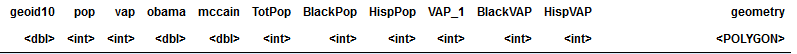
- geoid10 (double): this does not appear to be important as the sample file has all values as `NA`.
- pop (int): the total population of the district
- vap (int): the total population that is of voting age (voting age population)
- obama (dbl): # of votes for obama
- mccain (dbl): # of votes for mccain
- TotPop (int): identical to pop
- BlackPop (int): total Black population
- HispPop (int): total Hispanic population
- VAP_1 (int): identical to vap
- BlackVAP (int): total Black population that is of voting age
- HistVAP (int): total Hispanic population that is of voting age
- geometry (polygon): sf geometry for the precinct. 
Source: http://kosukeimai.github.io/redist/articles/Intro-to-redist.html

Here is the data for the VA data that's relevant to the 2017 house of delegates elections. 

* `precinct`: Precinct name
* `locality`: Locality name
* `loc_prec`: Locality and precinct names
* `district`: Congressional district name
* `G17DHOD`: Number of votes for 2017 Democratic House of Delegates candidate
* `G17RHOD`: Number of votes for 2017 Republican House of Delegates candidate
* `TOTPOP`: Total population 
* `NH_WHITE`: White, non-hispanic, population
* `NH_BLACK`: Black, non-hispanic, population
* `NH_AMIN`: American Indian and Alaska Native, non-hispanic, population
* `NH_ASIAN`: Asian, non-hispanic, population
* `NH_NHPI`: Native Hawaiian and Pacific Islander, non-hispanic, population
* `NH_OTHER`: Other race, non-hispanic, population
* `NH_2MORE`: Two or more races, non-hispanic, population
* `HISP`: Hispanic population
* `H_WHITE`: White, hispanic, population
* `H_BLACK`: Black, hispanic, population
* `H_AMIN`: American Indian and Alaska Native, hispanic, population
* `H_ASIAN`: Asian, hispanic, population
* `H_NHPI`: Native Hawaiian and Pacific Islander, hispanic, population
* `H_OTHER`: Other race, hispanic, population
* `H_2MORE`: Two or more races, hispanic, population
* `VAP`: Total voting age population
* `HVAP`: Hispanic voting age population
* `WVAP`: White, non-hispanic, voting age population
* `BVAP`: Black, non-hispanic, voting age population
* `AMINVAP`: American Indian and Alaska Native, non-hispanic, voting age population
* `ASIANVAP`: Asian, non-hispanic, voting age population
* `NHPIVAP`: Native Hawaiian and Pacific Islander, non-hispanic, voting age population
* `OTHERVAP`: Other race, non-hispanic, voting age population
* `2MOREVAP`: Two or more races, non-hispanic, voting age population
* `HDIST_11`: 2011 enacted House of Delegates district ID

#### Mapping

Here is the mapping that I'm thinking will work. 

Sample FL Data <- VA data I'm cleaning

`geoid10` <- `loc_prec` (this is not an integer, but it is a unique identifier.

`pop` <- `TOTPOP`

`vap` <- `VAP`

`obama` <- `G17DHOD` (using obama as a stand-in for democratic votes)

`mccain` <- `G17RHOD`  (using mccain as a stand-in for republican votes)

`TotPop` <- `TOTPOP`

`BlackPop` <- `NH_BLACK` (I know that this is excluding the Black and hispanic population, but this seems to be the appropriate decision given how the VAP is presented, where hispanic superceeds Black.)

`HispPop` <- `HISP`

`VAP_1` <- `VAP`

`BlackVAP` <- `BVAP`

`HispVAP` <- `HVAP`

`geometry` <- `geometry`


In [3]:
# copy over only the necessary columns
cols = ["TOTPOP", "VAP", "G17DHOD", "G17RHOD", "TOTPOP","NH_BLACK", "HISP", "VAP", "BVAP", "HVAP", "geometry"]
df_clean = pd.DataFrame(data=df, columns=cols)

# rename the columns to match the standard format. Not using dictionary b/c I have cols with the same names. 
df_clean.columns = ["pop", "vap", "obama", "mccain", "TotPop", 
                    "BlackPop", "HispPop", "VAP_1", "BlackVAP", "HispVAP", "geometry"]

# change the index to be the geoid10
df_clean.insert(0, "geoid10", df_clean.index)

df_clean.head(3)

,geoid10,pop,vap,obama,mccain,TotPop,BlackPop,HispPop,VAP_1,BlackVAP,HispVAP,geometry
0,0,3651.999992,2474.999995,650.0,804.0,3651.999992,304.000000,316.000000,2474.999995,199.000000,215.000000,"POLYGON ((163199.056 308336.365, 163189.724 30..."
1,1,3818.000031,2675.000021,601.0,644.0,3818.000031,405.000005,469.000001,2675.000021,288.000004,313.000000,"POLYGON ((162078.796 309095.892, 162068.091 30..."
2,2,4496.999984,2876.999990,963.0,1027.0,4496.999984,504.999996,560.999997,2876.999990,344.999997,345.999998,"POLYGON ((163554.036 308215.804, 163546.179 30..."


In [4]:
# convert the geoid10 to a float
df_clean["geoid10"] = df_clean["geoid10"].astype("float64")

# convert the population cols from doubles to ints. Round!!
cols_to_round = ["pop", "vap", "TotPop", "BlackPop", "HispPop", "VAP_1", "BlackVAP", "HispVAP"]
for c in cols_to_round:
    df_clean[c] = round(df_clean[c]).astype("int64")

df_clean.dtypes                      

geoid10      float64
pop            int64
vap            int64
obama         object
mccain        object
TotPop         int64
BlackPop       int64
HispPop        int64
VAP_1          int64
BlackVAP       int64
HispVAP        int64
geometry    geometry
dtype: object

#### To .rda file

This is looking pretty good. `df_clean` is now in the proper format to be used by MCMC. Now I need to export it. According to the documentation of `redist`, all of their sample data is stored in `.rda` files, which seems to be basically an older version of the `.RDATA` file that modern R uses. ([Source][3]). 

[3]: https://fileinfo.com/extension/rda

I tried several different Python to R converters and was running into lots of issues, so I'm just going to spit it out as a CSV and see where I can go from there in R. 

In [7]:
df_clean.to_csv(path_or_buf="test.csv", index=False, index_label=False)

### Works Cited:

Fifield, B., Higgins, M., Imai, K., & Tarr, A. (2020). Automated redistricting simulation using Markov chain Monte Carlo. Journal of Computational and Graphical Statistics, 0(0), 1–14.

Metric Geometry and Gerrymandering Group [MGGG]. (2021). Mggg-states/VA-shapefiles. MGGG States. https://github.com/mggg-states/VA-shapefiles (Original work published 2019)